In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sqlalchemy.orm import sessionmaker

In [3]:
from sqlalchemy import func
from sqlalchemy.orm import aliased

In [4]:
from sqlalchemy.orm import declarative_base, relationship
from sqlalchemy import Column, Integer, String, DateTime, ForeignKey
from datetime import datetime

Base = declarative_base()

class Partner(Base):
    __tablename__ = 'partners'

    id = Column(Integer, primary_key=True)
    name = Column(String(100), nullable=False)
    contact_info = Column(String(255))
    created_at = Column(DateTime, default=datetime.utcnow)


class Project(Base):
    __tablename__ = 'projects'

    id = Column(Integer, primary_key=True)
    name = Column(String(100), nullable=False)
    description = Column(String(255))
    created_at = Column(DateTime, default=datetime.utcnow)


class Photo(Base):
    __tablename__ = 'photos'

    id = Column(Integer, primary_key=True)
    filename = Column(String(255), nullable=False)
    partner_id = Column(Integer, ForeignKey('partners.id'), nullable=False)
    project_id = Column(Integer, ForeignKey('projects.id'), nullable=False)
    received_at = Column(DateTime, default=datetime.utcnow)

    partner = relationship("Partner")
    project = relationship("Project")


class Annotator(Base):
    __tablename__ = 'annotators'

    id = Column(Integer, primary_key=True)
    name = Column(String(100), nullable=False)
    email = Column(String(255))
    team = Column(String(100))
    created_at = Column(DateTime, default=datetime.utcnow)


class Iteration(Base):
    __tablename__ = 'iterations'

    id = Column(Integer, primary_key=True)
    photo_id = Column(Integer, ForeignKey('photos.id'), nullable=False)
    annotator_id = Column(Integer, ForeignKey('annotators.id'), nullable=False)
    iteration_number = Column(Integer, nullable=False)
    task_type = Column(String(100))
    notes = Column(String(255))
    processed_at = Column(DateTime, default=datetime.utcnow)

    photo = relationship("Photo")
    annotator = relationship("Annotator")

In [5]:
from sqlalchemy import create_engine

db_user = 'user'
db_password = 'userpassword'
db_host = 'mariadb_basics'
db_port = '3306'
db_name = 'mydatabase'

# URL de conexión para SQLAlchemy con PyMySQL
connection_url = f"mysql+pymysql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"

# Crear el engine de SQLAlchemy
engine = create_engine(connection_url, echo=False)

In [6]:
# Crear una sesión
Session = sessionmaker(bind=engine)
session = Session()

In [7]:
# Consulta con SQLAlchemy ORM
photo_counts = (
    session.query(Partner.name, func.count(Photo.id).label("total_fotos"))
    .join(Photo, Partner.id == Photo.partner_id)
    .group_by(Partner.name)
    .all()
)

         Partner  Total Fotos
0  Partner Alpha            2
1   Partner Beta            1


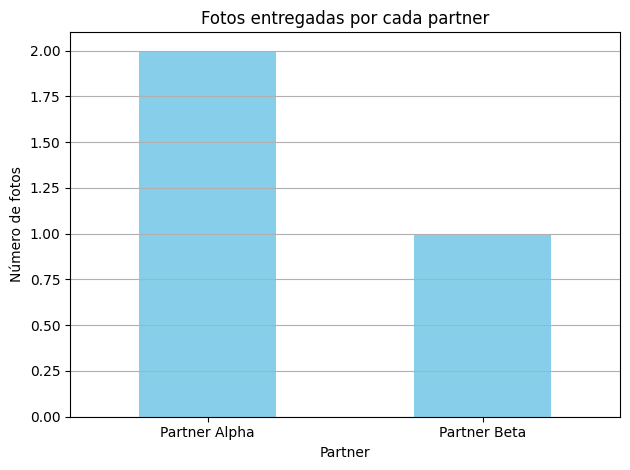

In [8]:
# Convertimos a DataFrame
df_photos_by_partner = pd.DataFrame(photo_counts, columns=["Partner", "Total Fotos"])
print(df_photos_by_partner)

# Visualizar
df_photos_by_partner.plot(kind="bar", x="Partner", y="Total Fotos", legend=False, color="skyblue")
plt.title("Fotos entregadas por cada partner")
plt.ylabel("Número de fotos")
plt.xlabel("Partner")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [10]:
annotator_counts = (
    session.query(Annotator.name, func.count(Iteration.id).label("total_iteraciones"))
    .join(Iteration, Annotator.id == Iteration.annotator_id)
    .group_by(Annotator.name)
    .order_by(func.count(Iteration.id).desc())
    .all()
)

        Anotador  Total Iteraciones
0  Lucía Herrera                  2
1    Carlos Ruiz                  1


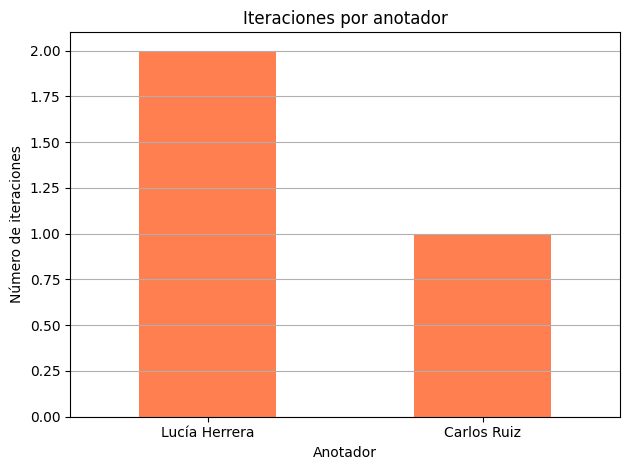

In [11]:
df_iterations_by_annotator = pd.DataFrame(annotator_counts, columns=["Anotador", "Total Iteraciones"])
print(df_iterations_by_annotator)

# Visualizar
df_iterations_by_annotator.plot(kind="bar", x="Anotador", y="Total Iteraciones", color="coral", legend=False)
plt.title("Iteraciones por anotador")
plt.ylabel("Número de iteraciones")
plt.xlabel("Anotador")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()